In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import time


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from get_data_from_binance.get_current_data import get_current_data as gkd

In [5]:
from get_data_from_binance.get_current_data import price_name_now, price_name_jun

In [6]:
data_today = gkd()

starting
done


In [7]:
df = pd.DataFrame(data_today)

In [8]:
#drop None 
df_clean = df.dropna(0)


In [9]:
df_clean

,symbol,price2021-01-01,price2020-06-01
0,BTCUSDT,29765.31000000,10380.00000000
1,ETHUSDT,1237.16000000,253.80000000
2,BNBUSDT,39.99020000,18.20000000
4,NEOUSDT,20.72600000,13.20000000
5,LTCUSDT,121.51000000,49.96000000
...,...,...,...
251,RIFUSDT,0.14680000,0.50000000
252,BTCSTUSDT,62.66900000,1000.00000000
253,TRUUSDT,0.20850000,0.38500000
254,CKBUSDT,0.00515400,0.00820000


In [10]:
#convert all to numeric
df[price_name_now] = pd.to_numeric(df[price_name_now])
df[price_name_jun] = pd.to_numeric(df[price_name_jun])


In [11]:
df_clean

,symbol,price2021-01-01,price2020-06-01
0,BTCUSDT,29765.31000000,10380.00000000
1,ETHUSDT,1237.16000000,253.80000000
2,BNBUSDT,39.99020000,18.20000000
4,NEOUSDT,20.72600000,13.20000000
5,LTCUSDT,121.51000000,49.96000000
...,...,...,...
251,RIFUSDT,0.14680000,0.50000000
252,BTCSTUSDT,62.66900000,1000.00000000
253,TRUUSDT,0.20850000,0.38500000
254,CKBUSDT,0.00515400,0.00820000


In [12]:
#add change in price colmn as a percantage
df_clean['price_change'] = (df[price_name_now] - df[price_name_jun]) / df[price_name_jun] * 100


<ipython-input-12-c0367c3201c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_change'] = (df[price_name_now] - df[price_name_jun]) / df[price_name_jun] * 100


In [13]:
df_clean.head(10)

,symbol,price2021-01-01,price2020-06-01,price_change
0,BTCUSDT,29765.31000000,10380.00000000,186.756358
1,ETHUSDT,1237.16000000,253.80000000,387.454689
2,BNBUSDT,39.99020000,18.20000000,119.726374
4,NEOUSDT,20.72600000,13.20000000,57.015152
5,LTCUSDT,121.51000000,49.96000000,143.214572
6,QTUMUSDT,3.08600000,1.92400000,60.395010
7,ADAUSDT,0.31130000,0.09039000,244.396504
8,XRPUSDT,0.24850000,0.21470000,15.742897
9,EOSUSDT,2.50050000,2.89390000,-13.594112
10,TUSDUSDT,1.00000000,1.00190000,-0.189640


In [14]:
btc_price_change = 240.958574

In [15]:
# add comparison to btc growth
df_clean["compare_to_btc"] = (df_clean["price_change"] - btc_price_change) / df_clean["price_change"] *100
df_clean["compare_to_btc"] = df_clean["compare_to_btc"].round(2)

<ipython-input-15-9d248949d50d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["compare_to_btc"] = (df_clean["price_change"] - btc_price_change) / df_clean["price_change"] *100
<ipython-input-15-9d248949d50d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["compare_to_btc"] = df_clean["compare_to_btc"].round(2)


In [16]:
df_clean

,symbol,price2021-01-01,price2020-06-01,price_change,compare_to_btc
0,BTCUSDT,29765.31000000,10380.00000000,186.756358,-29.02
1,ETHUSDT,1237.16000000,253.80000000,387.454689,37.81
2,BNBUSDT,39.99020000,18.20000000,119.726374,-101.26
4,NEOUSDT,20.72600000,13.20000000,57.015152,-322.62
5,LTCUSDT,121.51000000,49.96000000,143.214572,-68.25
...,...,...,...,...,...
251,RIFUSDT,0.14680000,0.50000000,-70.640000,441.11
252,BTCSTUSDT,62.66900000,1000.00000000,-93.733100,357.07
253,TRUUSDT,0.20850000,0.38500000,-45.844156,625.60
254,CKBUSDT,0.00515400,0.00820000,-37.146341,748.67


In [18]:
# df_clean.drop(labels=10,inplace=True)
# df_clean.drop(labels=0,inplace=True)
# find other way to delete btc_usdt and USDT USDT pairs
df_clean.head(10)

,symbol,price2021-01-01,price2020-06-01,price_change,compare_to_btc
0,BTCUSDT,29765.31000000,10380.00000000,186.756358,-29.02
1,ETHUSDT,1237.16000000,253.80000000,387.454689,37.81
2,BNBUSDT,39.99020000,18.20000000,119.726374,-101.26
4,NEOUSDT,20.72600000,13.20000000,57.015152,-322.62
5,LTCUSDT,121.51000000,49.96000000,143.214572,-68.25
6,QTUMUSDT,3.08600000,1.92400000,60.395010,-298.97
7,ADAUSDT,0.31130000,0.09039000,244.396504,1.41
8,XRPUSDT,0.24850000,0.21470000,15.742897,-1430.59
9,EOSUSDT,2.50050000,2.89390000,-13.594112,1872.52
10,TUSDUSDT,1.00000000,1.00190000,-0.189640,127161.26


In [32]:
df_clean.sort_values(by='price_change', axis=0)

,symbol,price2021-01-01,price2020-06-01,price_change,compare_to_btc
144,LINKDOWNUSDT,0.00413300,12.25000000,-99.966261,341.04
214,SXPDOWNUSDT,0.00520000,10.92000000,-99.952381,341.07
235,AAVEDOWNUSDT,0.00832000,12.22300000,-99.931932,341.12
239,SUSHIDOWNUSDT,0.01058000,13.37600000,-99.920903,341.15
140,ETHDOWNUSDT,0.02092000,11.49000000,-99.817929,341.40
...,...,...,...,...,...
127,LENDUSDT,0.51431000,0.07100000,624.380282,61.41
139,ETHUPUSDT,89.82900000,10.24000000,777.236328,69.00
210,ALPHAUSDT,1.36709000,0.15000000,811.393333,70.30
48,FTMUSDT,0.07694000,0.00675000,1039.851852,76.83


In [23]:
df_clean.to_json(f'datasets_raw/{price_name_now}.json')

Text(0, 0.5, 'In bin')

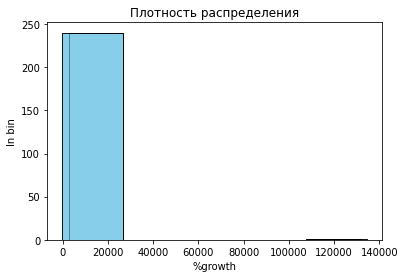

In [31]:
# matplotlib histogram
plt.hist(df_clean['price_change'], color = 'skyblue', edgecolor = 'black',
         bins = 5)

# seaborn histogram
sns.distplot(df_clean['price_change'], hist=True, kde=False, 
             bins=50, color = 'skyblue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Плотность распределения')
plt.xlabel('%growth')
plt.ylabel('In bin')

## TO btc growth comparison

Text(0, 0.5, 'y')

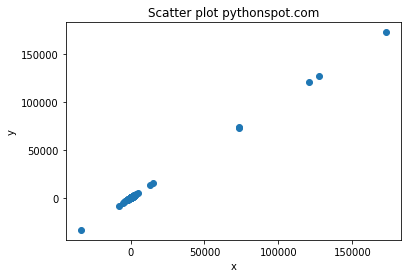

In [25]:

# Plot
plt.scatter(df_clean["compare_to_btc"],df_clean["compare_to_btc"])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')

In [26]:
# clean outliers
df_no_outlier = df_clean[df_clean['price_change'] < 400]
df_no_outlier = df_no_outlier[df_no_outlier['price_change'] > 0]

In [27]:
df_no_outlier

,symbol,price2021-01-01,price2020-06-01,price_change,compare_to_btc
0,BTCUSDT,29765.31000000,10380.00000000,186.756358,-29.02
1,ETHUSDT,1237.16000000,253.80000000,387.454689,37.81
2,BNBUSDT,39.99020000,18.20000000,119.726374,-101.26
4,NEOUSDT,20.72600000,13.20000000,57.015152,-322.62
5,LTCUSDT,121.51000000,49.96000000,143.214572,-68.25
...,...,...,...,...,...
226,AXSUSDT,0.92025000,0.29000000,217.327586,-10.87
230,UNFIUSDT,8.74000000,6.59000000,32.625190,-638.57
232,AVAUSDT,1.54600000,1.05000000,47.238095,-410.09
233,XEMUSDT,0.22710000,0.21720000,4.558011,-5186.49


/home/uru/anaconda3/envs/trading/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'In bin')

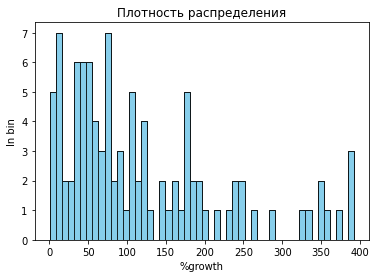

In [28]:
# matplotlib histogram
plt.hist(df_no_outlier['price_change'], color = 'skyblue', edgecolor = 'black',
         bins = 50)

# seaborn histogram
sns.distplot(df_no_outlier['price_change'], hist=True, kde=False, 
             bins=50, color = 'skyblue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Плотность распределения')
plt.xlabel('%growth')
plt.ylabel('In bin')